# EDA: Craigslist Rental Data

This demo wasn't shown in class, but you can look through this notebook for another example of conducting EDA.

In this notebook, we perform exploratory data analysis (EDA) on rental housing data downloaded from Craigslist. 

We use the following search criteria: https://sfbay.craigslist.org/search/eby/apa?nh=47&nh=48&nh=49&nh=112&nh=58&nh=59&nh=60&nh=61&nh=62&nh=63&nh=66&nh=64&nh=65&min_price=500&max_price=7500&min_bedrooms=1&min_bathrooms=1&availabilityMode=0&sale_date=all+dates

We obtain rental data from Craigslist in two steps (using two R scripts). 

1. We fetch the HTML page for each post of interest and write it to disk.  

2. We process this collection of HTML documents into a data frame, available in the file d_120219.csv.    


The EDA reveals a number of errors in the listings as well as possible bugs in the code that was use to scrape the website and parse the downloaded HTML files. 

In [344]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import webbrowser

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Read in Data and Compute Basic Summary Statistics

In [345]:
df = pd.read_csv("d_120219.csv")

type(df)
df.shape
df.columns
df.head()

df.index = df['Unnamed: 0']
df = df.drop(columns = 'Unnamed: 0')
df.shape
df.head()

pandas.core.frame.DataFrame

(2139, 14)

Index(['Unnamed: 0', 'id', 'price', 'title', 'body', 'lat', 'long', 'posted',
       'updated', 'header', 'file', 'bedrooms', 'bath', 'sqft'],
      dtype='object')

,Unnamed: 0,id,price,title,body,lat,long,posted,updated,header,file,bedrooms,bath,sqft
0,_eby_apa_d_1-2-mth-free-unfurnished-modern-3bd...,6809166875,6500,$6500 / 3br - 1900ft2 - 1/2 MTH FREE! Unfurnis...,\n QR Code Link to This Post\n ...,37.894549,-122.263756,2019-02-01T09:54:18-0800,2019-02-05T06:50:49-0800,3BR / 3Ba,_eby_apa_d_1-2-mth-free-unfurnished-modern-3bd...,3,3,1900.0
1,_eby_apa_d_1-bedroom-pet-friendly-building-146...,6817699544,1795,$1795 / 1br - 1 bedroom Pet-friendly Building!...,\n QR Code Link to This Post\n ...,37.803334,-122.266724,2019-02-12T10:14:49-0800,2019-02-12T10:14:50-0800,1BR / 1Ba,_eby_apa_d_1-bedroom-pet-friendly-building-146...,1,1,NaN
2,_eby_apa_d_1-bedroom-pet-friendly-building-146...,6817715072,1995,$1995 / 1br - 1 bedroom Pet-friendly Building!...,\n QR Code Link to This Post\n ...,37.803334,-122.266724,2019-02-12T10:29:31-0800,2019-02-12T10:35:29-0800,1BR / 1Ba,_eby_apa_d_1-bedroom-pet-friendly-building-146...,1,1,NaN
3,_eby_apa_d_1-br-1-ba-berkeley-available-now_68...,6817370571,2200,"$2200 / 1br - 1 BR / 1 BA Berkeley, Available ...",\n QR Code Link to This Post\n ...,37.857026,-122.280080,2019-02-11T22:20:53-0800,2019-02-12T15:28:04-0800,1BR / 1Ba,_eby_apa_d_1-br-1-ba-berkeley-available-now_68...,1,1,NaN
4,_eby_apa_d_1-br-with-parking-near-downtown_681...,6814999655,1950,$1950 / 1br - 500ft2 - 1 br with parking near ...,\n QR Code Link to This Post\n ...,37.866400,-122.257000,2019-02-08T16:37:38-0800,NaN,1BR / 1Ba,_eby_apa_d_1-br-with-parking-near-downtown_681...,1,1,500.0


(2139, 13)

,id,price,title,body,lat,long,posted,updated,header,file,bedrooms,bath,sqft
Unnamed: 0,,,,,,,,,,,,,
_eby_apa_d_1-2-mth-free-unfurnished-modern-3bd_6809166875.html,6809166875,6500,$6500 / 3br - 1900ft2 - 1/2 MTH FREE! Unfurnis...,\n QR Code Link to This Post\n ...,37.894549,-122.263756,2019-02-01T09:54:18-0800,2019-02-05T06:50:49-0800,3BR / 3Ba,_eby_apa_d_1-2-mth-free-unfurnished-modern-3bd...,3,3,1900.0
_eby_apa_d_1-bedroom-pet-friendly-building-1461_6817699544.html,6817699544,1795,$1795 / 1br - 1 bedroom Pet-friendly Building!...,\n QR Code Link to This Post\n ...,37.803334,-122.266724,2019-02-12T10:14:49-0800,2019-02-12T10:14:50-0800,1BR / 1Ba,_eby_apa_d_1-bedroom-pet-friendly-building-146...,1,1,NaN
_eby_apa_d_1-bedroom-pet-friendly-building-1461_6817715072.html,6817715072,1995,$1995 / 1br - 1 bedroom Pet-friendly Building!...,\n QR Code Link to This Post\n ...,37.803334,-122.266724,2019-02-12T10:29:31-0800,2019-02-12T10:35:29-0800,1BR / 1Ba,_eby_apa_d_1-bedroom-pet-friendly-building-146...,1,1,NaN
_eby_apa_d_1-br-1-ba-berkeley-available-now_6817370571.html,6817370571,2200,"$2200 / 1br - 1 BR / 1 BA Berkeley, Available ...",\n QR Code Link to This Post\n ...,37.857026,-122.280080,2019-02-11T22:20:53-0800,2019-02-12T15:28:04-0800,1BR / 1Ba,_eby_apa_d_1-br-1-ba-berkeley-available-now_68...,1,1,NaN
_eby_apa_d_1-br-with-parking-near-downtown_6814999655.html,6814999655,1950,$1950 / 1br - 500ft2 - 1 br with parking near ...,\n QR Code Link to This Post\n ...,37.866400,-122.257000,2019-02-08T16:37:38-0800,NaN,1BR / 1Ba,_eby_apa_d_1-br-with-parking-near-downtown_681...,1,1,500.0


In [346]:
df.describe()

,id,price,lat,long,bedrooms,bath,sqft
count,2.139000e+03,2139.000000,2135.000000,2135.000000,2139.000000,2139.000000,1399.000000
mean,6.812191e+09,2845.575503,37.841872,-122.252225,1.787751,1.503506,1043.380272
std,5.935419e+06,907.091967,0.121537,0.568694,0.820584,1.008552,2552.097098
min,6.788557e+09,555.000000,32.892980,-122.481502,1.000000,1.000000,1.000000
25%,6.810320e+09,2200.000000,37.808500,-122.285100,1.000000,1.000000,700.000000
50%,6.814205e+09,2670.000000,37.834836,-122.266588,2.000000,1.000000,850.000000
75%,6.816306e+09,3312.500000,37.867726,-122.250911,2.000000,2.000000,1115.500000
max,6.818007e+09,7500.000000,38.129373,-96.076540,6.000000,5.000000,94602.000000


**N.B.** There seem to be outliers in terms of sqft, lat, and long. 

### Number of NaN

In [347]:
# len(df) - df.count()
df.isnull().sum()

id             0
price          0
title          0
body           0
lat            4
long           4
posted         0
updated     1039
header         0
file           0
bedrooms       0
bath           0
sqft         740
dtype: int64

## Data Cleaning

### Multiple Listings with Same ID
If there are multiple listings with the same ID, keep the listing updated most recently.

In [348]:
len(set(df['id']))
len(set(df['file']))
# np.unique(df['id'], return_counts=True)

2139

2139

In [349]:
(df.reset_index()
   .sort_values('updated', ascending=False)
   .groupby('id', as_index=False)
   .first()
   .set_index('Unnamed: 0')
)

,id,price,title,body,lat,long,posted,updated,header,file,bedrooms,bath,sqft
Unnamed: 0,,,,,,,,,,,,,
_eby_apa_d_oakland-first-floor-2-bedroom-near_6788556664.html,6788556664,2095,$2095 / 2br - First floor 2 bedroom near Highl...,\n QR Code Link to This Post\n ...,37.794394,-122.233596,2019-01-06T13:58:00-0800,2019-02-11T15:21:12-0800,2BR / 1Ba,_eby_apa_d_oakland-first-floor-2-bedroom-near_...,2,1,NaN
_eby_apa_d_oakland-ground-floor-2-bedroom-with_6789660103.html,6789660103,2495,$2495 / 2br - Ground Floor 2 bedroom with priv...,\n QR Code Link to This Post\n ...,37.820275,-122.253068,2019-01-07T21:59:11-0800,2019-02-06T09:16:18-0800,2BR / 1.5Ba,_eby_apa_d_oakland-ground-floor-2-bedroom-with...,2,5,NaN
_eby_apa_d_berkeleybr-786ft-fall-security-deposit_6789926479.html,6789926479,3500,$3500 / 2br - 786ft2 - $3500 / 2br - 786ft - F...,\n QR Code Link to This Post\n ...,37.874825,-122.269080,2019-01-08T09:14:51-0800,2019-02-06T14:48:27-0800,2BR / 1Ba,_eby_apa_d_berkeleybr-786ft-fall-security-depo...,2,1,786.0
_eby_apa_d_oakland-amazing-remodeled-2br-1ba-walk_6790076454.html,6790076454,2995,"$2995 / 2br - Amazing, Remodeled 2BR-1BA walk ...",\n QR Code Link to This Post\n ...,37.813005,-122.254293,2019-01-08T11:30:55-0800,2019-02-06T12:29:36-0800,2BR / 1Ba,_eby_apa_d_oakland-amazing-remodeled-2br-1ba-w...,2,1,NaN
_eby_apa_d_oakland-available-one-bedroom-one_6790438871.html,6790438871,1850,$1850 / 1br - Available one bedroom one bathro...,\n QR Code Link to This Post\n ...,37.812524,-122.257526,2019-01-08T19:23:23-0800,2019-02-06T16:44:38-0800,1BR / 1Ba,_eby_apa_d_oakland-available-one-bedroom-one_6...,1,1,NaN
_eby_apa_d_richmond-beautiful-quite-area-richmond_6791056300.html,6791056300,1600,$1600 / 1br - **Beautiful & quite area Richmon...,\n QR Code Link to This Post\n ...,37.915019,-122.332249,2019-01-09T14:05:18-0800,2019-02-09T12:53:21-0800,1BR / 1Ba,_eby_apa_d_richmond-beautiful-quite-area-richm...,1,1,NaN
_eby_apa_d_berkeley-elegantly-remodeled-2-bedroom_6791121279.html,6791121279,3495,$3495 / 2br - Elegantly Remodeled 2 Bedroom in...,\n QR Code Link to This Post\n ...,37.878164,-122.264337,2019-01-09T15:23:31-0800,2019-02-12T14:49:29-0800,2BR / 1Ba,_eby_apa_d_berkeley-elegantly-remodeled-2-bedr...,2,1,NaN
_eby_apa_d_berkeley-new-construction-lofts-near_6791121671.html,6791121671,3850,$3850 / 2br - 1190ft2 - *New Construction Loft...,\n QR Code Link to This Post\n ...,37.865826,-122.301980,2019-01-09T15:24:01-0800,2019-02-12T10:07:24-0800,2BR / 2Ba,_eby_apa_d_berkeley-new-construction-lofts-nea...,2,2,1190.0
_eby_apa_d_oakland-piedmont-ave-area-two-bedrooms_6791184688.html,6791184688,2650,$2650 / 2br - Piedmont Ave Area Two bedrooms 4...,\n QR Code Link to This Post\n ...,37.830761,-122.249247,2019-01-09T16:54:55-0800,2019-02-07T21:50:11-0800,2BR / 1Ba,_eby_apa_d_oakland-piedmont-ave-area-two-bedro...,2,1,NaN


### Outliers: Square footage

In [350]:
df['sqft'].describe()
df['sqft'].isnull().sum()

count     1399.000000
mean      1043.380272
std       2552.097098
min          1.000000
25%        700.000000
50%        850.000000
75%       1115.500000
max      94602.000000
Name: sqft, dtype: float64

740

In [351]:
df['sqft'].sort_values().head()

Unnamed: 0
_eby_apa_d_oakland-newly-renovated-1br-1ba-only-1_6804551647.html      1.0
_eby_apa_d_oakland-nice-small-room-for-rent-walk_6809706924.html      90.0
_eby_apa_d_berkeley-gorgeous-furnished-cottage_6812273568.html       100.0
_eby_apa_d_richmondbr-101ft2-2-br-2ba-water-front_6816700053.html    101.0
_eby_apa_d_berkeley-semi-co-op-seeking-sixth_6817388662.html         135.0
Name: sqft, dtype: float64

In [352]:
df['sqft'].sort_values(ascending=False).head()

Unnamed: 0
_eby_apa_d_oakland-large-2-bed-1-bath-in-upper_6814609488.html     94602.0
_eby_apa_d_oakland-casa-por-renta_6810327980.html                  10000.0
_eby_apa_d_oakland-two-story-mixed-use-building_6809406871.html     4800.0
_eby_apa_d_oakland-oakland-hills-home-with_6803666708.html          4060.0
_eby_apa_d_oaklandbr-3ba-3200ft2-spacious_6815678295.html           3200.0
Name: sqft, dtype: float64

In [353]:
i = (df['sqft']>5000) | (df['sqft']<100)
sum(i)
df[i]

4

,id,price,title,body,lat,long,posted,updated,header,file,bedrooms,bath,sqft
Unnamed: 0,,,,,,,,,,,,,
_eby_apa_d_oakland-casa-por-renta_6810327980.html,6810327980,2500,$2500 / 2br - 10000ft2 - Casa por renta (oakla...,\n QR Code Link to This Post\n ...,37.764100,-122.163300,2019-02-02T17:42:04-0800,2019-02-05T10:52:48-0800,2BR / 1.5Ba,_eby_apa_d_oakland-casa-por-renta_6810327980.html,2,5,10000.0
_eby_apa_d_oakland-large-2-bed-1-bath-in-upper_6814609488.html,6814609488,2995,$2995 / 2br - 94602ft2 - Large 2 Bed - 1 Bath ...,\n QR Code Link to This Post\n ...,37.800766,-122.202614,2019-02-08T09:37:15-0800,NaN,2BR / 1Ba,_eby_apa_d_oakland-large-2-bed-1-bath-in-upper...,2,1,94602.0
_eby_apa_d_oakland-newly-renovated-1br-1ba-only-1_6804551647.html,6804551647,2095,$2095 / 1br - 1ft2 - Newly renovated 1BR/1BA -...,\n QR Code Link to This Post\n ...,37.802901,-122.215326,2019-01-26T11:24:00-0800,2019-02-09T17:46:43-0800,1BR / 1Ba,_eby_apa_d_oakland-newly-renovated-1br-1ba-onl...,1,1,1.0
_eby_apa_d_oakland-nice-small-room-for-rent-walk_6809706924.html,6809706924,650,$650 / 1br - 90ft2 - Nice small room for rent ...,\n QR Code Link to This Post\n ...,37.780600,-122.216600,2019-02-02T02:38:24-0800,2019-02-10T18:43:40-0800,1BR / 1Ba,_eby_apa_d_oakland-nice-small-room-for-rent-wa...,1,1,90.0


Examine local copy of HTML files for listings with outlying sqft

In [354]:
h = []
for j in df.index[i]:
    h = h + [('file:///Users/sandrine/Teaching/Data100.S19/Data/Craigslist/rentaldata/Cache_120219/' + j)]
h
webbrowser.open(h[0])

['file:///Users/sandrine/Teaching/Data100.S19/Data/Craigslist/rentaldata/Cache_120219/_eby_apa_d_oakland-casa-por-renta_6810327980.html',
 'file:///Users/sandrine/Teaching/Data100.S19/Data/Craigslist/rentaldata/Cache_120219/_eby_apa_d_oakland-large-2-bed-1-bath-in-upper_6814609488.html',
 'file:///Users/sandrine/Teaching/Data100.S19/Data/Craigslist/rentaldata/Cache_120219/_eby_apa_d_oakland-newly-renovated-1br-1ba-only-1_6804551647.html',
 'file:///Users/sandrine/Teaching/Data100.S19/Data/Craigslist/rentaldata/Cache_120219/_eby_apa_d_oakland-nice-small-room-for-rent-walk_6809706924.html']

True

Examine listings with outlying sqft on Craigslist website 

In [355]:
h = []
for j in df.index[i]:
    str = j.replace("_","/")
    h = h + ['https://sfbay.craigslist.org' + str]
    
h
for j in h: 
    webbrowser.open(j)

['https://sfbay.craigslist.org/eby/apa/d/oakland-casa-por-renta/6810327980.html',
 'https://sfbay.craigslist.org/eby/apa/d/oakland-large-2-bed-1-bath-in-upper/6814609488.html',
 'https://sfbay.craigslist.org/eby/apa/d/oakland-newly-renovated-1br-1ba-only-1/6804551647.html',
 'https://sfbay.craigslist.org/eby/apa/d/oakland-nice-small-room-for-rent-walk/6809706924.html']

True

True

True

True

For three of the listings, the outlying sqft seems to be due to typos. We replace these typos in sqft with NaN.

In [356]:
for x in df.index[i][:3]:
    df.loc[x, 'sqft'] = np.nan

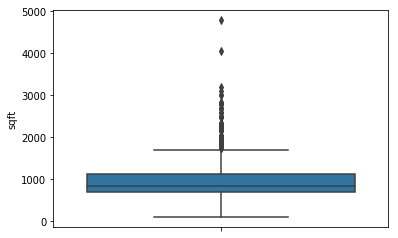

In [357]:
sns.boxplot(y='sqft', data=df)

[None]

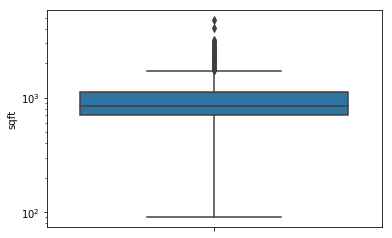

In [358]:
gr = sns.boxplot(y='sqft', data=df)
gr.set(yscale="log")

/Users/sandrine/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


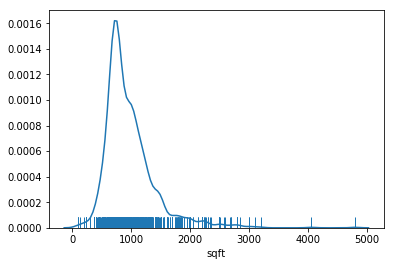

In [359]:
sqfts = df[df['sqft'].notnull()]['sqft']
sns.distplot(sqfts, hist=False, kde=True, rug=True)

/Users/sandrine/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[None]

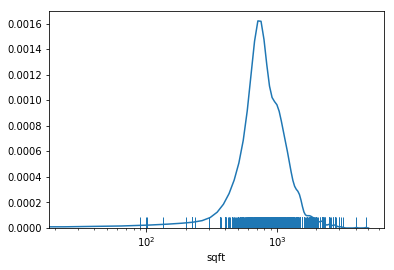

In [360]:
gr = sns.distplot(sqfts, hist=False, kde=True, rug=True)
gr.set(xscale="log")

### Outliers: Latitude and Longitude

UC Berkeley's latitude is 37.871853 and longitude -122.258423. 

There are a few outlying units in terms of latitude or longitude.

Examine and discard listings with latitude or longitude beyond 0.3 of UC Berkeley (somewhat arbitrary cutoff, could be refined).   



In [361]:
lg = -122.258423
lt = 37.871853

In [362]:
df[['long','lat']].describe()

,long,lat
count,2135.000000,2135.000000
mean,-122.252225,37.841872
std,0.568694,0.121537
min,-122.481502,32.892980
25%,-122.285100,37.808500
50%,-122.266588,37.834836
75%,-122.250911,37.867726
max,-96.076540,38.129373


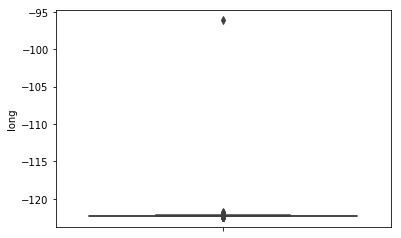

In [363]:
sns.boxplot(y = 'long', data=df)

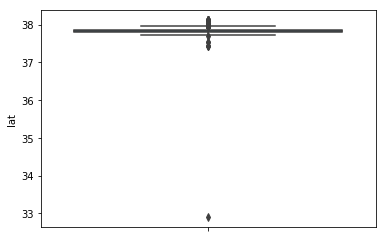

In [364]:
sns.boxplot(y = 'lat', data=df)

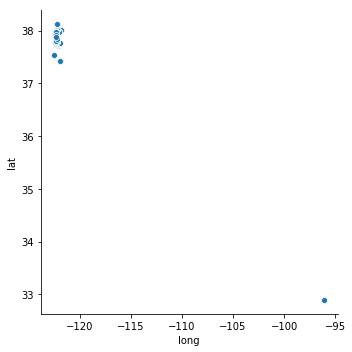

In [365]:
sns.relplot(x='long', y='lat', data=df)

In [366]:
i = (df['long'] > lg+0.3) | (df['long']< lg-0.3)
sum(i)
df[i]

7

,id,price,title,body,lat,long,posted,updated,header,file,bedrooms,bath,sqft
Unnamed: 0,,,,,,,,,,,,,
_eby_apa_d_antioch-section-8-welcome-3-bedroom-2_6813102962.html,6813102962,2400,$2400 / 3br - 1400ft2 - Section 8 Welcome! 3 b...,\n QR Code Link to This Post\n ...,38.013521,-121.814269,2019-02-06T11:24:09-0800,NaN,3BR / 2Ba,_eby_apa_d_antioch-section-8-welcome-3-bedroom...,3,2,1400.0
_eby_apa_d_antioch-units-with-washer-and-dryer_6812262553.html,6812262553,1805,$1805 / 2br - units with washer and dryer (oak...,\n QR Code Link to This Post\n ...,38.008321,-121.864673,2019-02-05T11:06:36-0800,NaN,2BR / 1Ba,_eby_apa_d_antioch-units-with-washer-and-dryer...,2,1,NaN
_eby_apa_d_quinlan-seeking-roommate-for-2bd-2bath_6808840542.html,6808840542,1755,$1755 / 2br - 1034ft2 - Seeking roommate for a...,\n QR Code Link to This Post\n ...,32.892980,-96.076540,2019-01-31T21:08:08-0800,2019-02-11T13:29:19-0800,2BR / 2Ba,_eby_apa_d_quinlan-seeking-roommate-for-2bd-2b...,2,2,1034.0
_eby_apa_d_san-jose-call-us-today-for-more_6815624402.html,6815624402,2645,$2645 / 2br - 820ft2 - Call us Today for More ...,\n QR Code Link to This Post\n ...,37.426738,-121.880867,2019-02-09T13:23:59-0800,NaN,2BR / 1.5Ba,_eby_apa_d_san-jose-call-us-today-for-more_681...,2,5,820.0
_eby_apa_d_san-jose-premium-quality-housing-with_6813071748.html,6813071748,2395,$2395 / 1br - 635ft2 - Premium Quality Housing...,\n QR Code Link to This Post\n ...,37.426738,-121.880867,2019-02-06T10:54:45-0800,NaN,1BR / 1Ba,_eby_apa_d_san-jose-premium-quality-housing-wi...,1,1,635.0
_eby_apa_d_san-jose-we-have-beautiful-apartment_6815043962.html,6815043962,3195,$3195 / 3br - 974ft2 - We have Beautiful Apart...,\n QR Code Link to This Post\n ...,37.426738,-121.880867,2019-02-08T17:53:11-0800,NaN,3BR / 2Ba,_eby_apa_d_san-jose-we-have-beautiful-apartmen...,3,2,974.0
_eby_apa_d_san-ramon-one-bedroom-one-bath-close-to_6816496202.html,6816496202,2650,$2650 / 1br - One bedroom one bath close to Pi...,\n QR Code Link to This Post\n ...,37.763600,-121.915500,2019-02-10T19:48:00-0800,2019-02-12T15:26:13-0800,1BR / 1Ba,_eby_apa_d_san-ramon-one-bedroom-one-bath-clos...,1,1,NaN


Examine listings with outlying longitude on Craigslist website.

In [367]:
h = []
for j in df.index[i]:
    str = j.replace("_","/")
    h = h + ['https://sfbay.craigslist.org' + str]
    
h
for j in h: 
    webbrowser.open(j)

['https://sfbay.craigslist.org/eby/apa/d/antioch-section-8-welcome-3-bedroom-2/6813102962.html',
 'https://sfbay.craigslist.org/eby/apa/d/antioch-units-with-washer-and-dryer/6812262553.html',
 'https://sfbay.craigslist.org/eby/apa/d/quinlan-seeking-roommate-for-2bd-2bath/6808840542.html',
 'https://sfbay.craigslist.org/eby/apa/d/san-jose-call-us-today-for-more/6815624402.html',
 'https://sfbay.craigslist.org/eby/apa/d/san-jose-premium-quality-housing-with/6813071748.html',
 'https://sfbay.craigslist.org/eby/apa/d/san-jose-we-have-beautiful-apartment/6815043962.html',
 'https://sfbay.craigslist.org/eby/apa/d/san-ramon-one-bedroom-one-bath-close-to/6816496202.html']

True

True

True

True

True

True

True

In [368]:
df=df.drop(df.index[i])
df.shape
df.describe()

(2132, 13)

,id,price,lat,long,bedrooms,bath,sqft
count,2.132000e+03,2132.000000,2128.000000,2128.000000,2132.000000,2132.000000,1391.000000
mean,6.812186e+09,2847.017355,37.844661,-122.265596,1.787054,1.501876,970.685119
std,5.943133e+06,907.836869,0.054997,0.041967,0.820697,1.007013,435.171768
min,6.788557e+09,555.000000,37.543883,-122.481502,1.000000,1.000000,90.000000
25%,6.810305e+09,2200.000000,37.808500,-122.285100,1.000000,1.000000,700.000000
50%,6.814206e+09,2674.000000,37.834923,-122.266698,2.000000,1.000000,850.000000
75%,6.816308e+09,3325.000000,37.867726,-122.250980,2.000000,2.000000,1114.500000
max,6.818007e+09,7500.000000,38.129373,-122.041048,6.000000,5.000000,4800.000000


In [369]:
i = (df['lat']>lt+0.3) | (df['lat']<lt-0.3)
sum(i)
df[i]

2

,id,price,title,body,lat,long,posted,updated,header,file,bedrooms,bath,sqft
Unnamed: 0,,,,,,,,,,,,,
_eby_apa_d_montara-fantastic-newly-renovated-1br_6816841556.html,6816841556,2450,$2450 / 1br - Fantastic Newly Renovated 1BR in...,\n QR Code Link to This Post\n ...,37.544438,-122.478524,2019-02-11T09:45:36-0800,NaN,1BR / 1Ba,_eby_apa_d_montara-fantastic-newly-renovated-1...,1,1,NaN
_eby_apa_d_montara-gorgeous-newly-renovated-1br-in_6817695221.html,6817695221,2350,$2350 / 1br - Gorgeous Newly Renovated 1BR in ...,\n QR Code Link to This Post\n ...,37.543883,-122.481502,2019-02-12T10:10:55-0800,NaN,1BR / 1Ba,_eby_apa_d_montara-gorgeous-newly-renovated-1b...,1,1,NaN


Examine listings with outlying latitude on Craigslist website.

In [370]:
h = []
for j in df.index[i]:
    str = j.replace("_","/")
    h = h + ['https://sfbay.craigslist.org' + str]
    
h
for j in h: 
    webbrowser.open(j)

['https://sfbay.craigslist.org/eby/apa/d/montara-fantastic-newly-renovated-1br/6816841556.html',
 'https://sfbay.craigslist.org/eby/apa/d/montara-gorgeous-newly-renovated-1br-in/6817695221.html']

True

True

In [371]:
df=df.drop(df.index[i])
df.shape
df.describe()

(2130, 13)

,id,price,lat,long,bedrooms,bath,sqft
count,2.130000e+03,2130.000000,2126.000000,2126.000000,2130.000000,2130.000000,1391.000000
mean,6.812182e+09,2847.437089,37.844944,-122.265394,1.787793,1.502347,970.685119
std,5.943867e+06,908.158449,0.054244,0.041468,0.820728,1.007368,435.171768
min,6.788557e+09,555.000000,37.701500,-122.441300,1.000000,1.000000,90.000000
25%,6.810287e+09,2200.000000,37.808641,-122.285100,1.000000,1.000000,700.000000
50%,6.814205e+09,2674.500000,37.835156,-122.266662,2.000000,1.000000,850.000000
75%,6.816303e+09,3325.000000,37.867726,-122.250980,2.000000,2.000000,1114.500000
max,6.818007e+09,7500.000000,38.129373,-122.041048,6.000000,5.000000,4800.000000


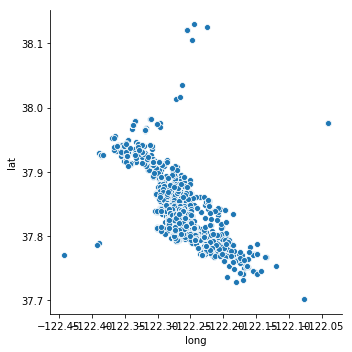

In [372]:
sns.relplot(x='long', y='lat', data=df)

/Users/sandrine/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


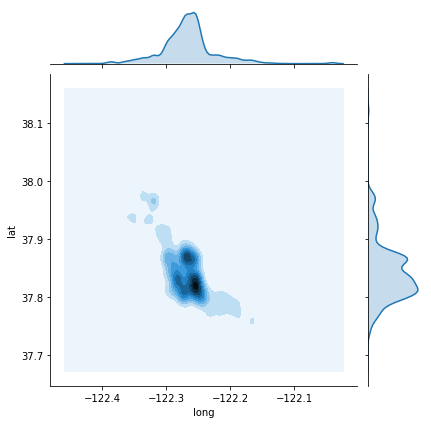

In [373]:
sns.jointplot(x='long', y='lat', kind='kde', data=df)

### Numbers of Bedrooms and Bathrooms

In [374]:
ct = pd.crosstab(df['bedrooms'], df['bath'])
ct

bath,1,2,3,4,5
bedrooms,,,,,
1,866,11,0,0,12
2,553,268,0,0,66
3,61,175,14,0,38
4,3,25,12,0,11
5,0,5,4,1,3
6,0,1,1,0,0


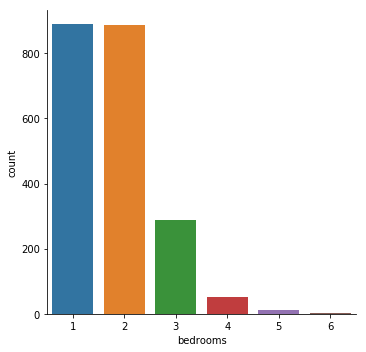

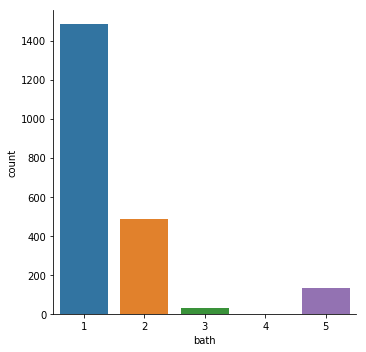

In [375]:
sns.catplot(x='bedrooms', kind='count', data=df)
sns.catplot(x='bath', kind='count', data=df)

In [376]:
# gr = mosaic(df,['bedrooms','bath'])

Inspection of units recorded as having 5 bathrooms but only 1 bedroom reveals a likely bug in the R parsing code: These units actually have 1.5 bathrooms. 

In [377]:
df[(df['bath']==5) & (df['bedrooms']==1)]

,id,price,title,body,lat,long,posted,updated,header,file,bedrooms,bath,sqft
Unnamed: 0,,,,,,,,,,,,,
_eby_apa_d_berkeley-1-bedroom-in-elmwood_6816800828.html,6816800828,2750,$2750 / 1br - 1 Bedroom in Elmwood (berkeley),\n QR Code Link to This Post\n ...,37.853726,-122.255580,2019-02-11T09:09:03-0800,NaN,1BR / 1.5Ba,_eby_apa_d_berkeley-1-bedroom-in-elmwood_68168...,1,5,850.0
_eby_apa_d_berkeley-art-studio-made-into-fabulous_6814940452.html,6814940452,3000,$3000 / 1br - Art Studio Made Into Fabulous Li...,\n QR Code Link to This Post\n ...,37.860609,-122.235477,2019-02-08T15:13:45-0800,NaN,1BR / 1.5Ba,_eby_apa_d_berkeley-art-studio-made-into-fabul...,1,5,NaN
_eby_apa_d_berkeley-panoramic-bay-sf-view-berkeley_6793594896.html,6793594896,4250,$4250 / 1br - 1800ft2 - Panoramic Bay & SF Vie...,\n QR Code Link to This Post\n ...,37.860760,-122.230153,2019-01-12T16:16:34-0800,2019-02-10T11:42:54-0800,1BR / 1.5Ba,_eby_apa_d_berkeley-panoramic-bay-sf-view-berk...,1,5,1800.0
_eby_apa_d_emeryville-pacific-park-plaza-furnished_6816899256.html,6816899256,3000,$3000 / 1br - Pacific Park Plaza FURNISHED & r...,\n QR Code Link to This Post\n ...,37.838626,-122.294780,2019-02-11T10:37:11-0800,NaN,1BR / 1.5Ba,_eby_apa_d_emeryville-pacific-park-plaza-furni...,1,5,768.0
_eby_apa_d_emeryvillest-st-1-bed1-bath-green_6800670419.html,6800670419,2995,"$2995 / 1br - 1007 41st St. 1 bed,1 bath, Gree...",\n QR Code Link to This Post\n ...,37.832133,-122.277753,2019-01-21T15:40:54-0800,2019-02-11T11:45:38-0800,1BR / 1.5Ba,_eby_apa_d_emeryvillest-st-1-bed1-bath-green_6...,1,5,NaN
_eby_apa_d_oakland-1-bed-15-bath-duplex-in-oakland_6812610941.html,6812610941,3000,$3000 / 1br - 1 Bed 1.5 Bath Duplex in Oakland...,\n QR Code Link to This Post\n ...,37.782328,-122.192478,2019-02-05T18:07:00-0800,NaN,1BR / 1.5Ba,_eby_apa_d_oakland-1-bed-15-bath-duplex-in-oak...,1,5,NaN
_eby_apa_d_oakland-luxury-one-bedroom-lake-view_6802803064.html,6802803064,3995,$3995 / 1br - 965ft2 - Luxury One Bedroom Lake...,\n QR Code Link to This Post\n ...,37.798927,-122.259680,2019-01-24T09:25:39-0800,2019-02-12T09:51:07-0800,1BR / 1.5Ba,_eby_apa_d_oakland-luxury-one-bedroom-lake-vie...,1,5,965.0
_eby_apa_d_oakland-new-1-month-free-free-parking_6817177226.html,6817177226,3405,$3405 / 1br - 773ft2 - NEW! 1 Month Free + Fre...,\n QR Code Link to This Post\n ...,37.820617,-122.261747,2019-02-11T15:24:24-0800,NaN,1BR / 1.5Ba,_eby_apa_d_oakland-new-1-month-free-free-parki...,1,5,773.0
_eby_apa_d_oakland-new-1-month-free-free-parking_6817840489.html,6817840489,3405,$3405 / 1br - 773ft2 - NEW! 1 Month Free + Fre...,\n QR Code Link to This Post\n ...,37.820617,-122.261747,2019-02-12T12:31:59-0800,NaN,1BR / 1.5Ba,_eby_apa_d_oakland-new-1-month-free-free-parki...,1,5,773.0


In [378]:
i = (df['bath']==5) & (df['bedrooms']==1)
h = []
for j in df.index[i]:
    str = j.replace("_","/")
    h = h + ['https://sfbay.craigslist.org' + str]
    
h
# for j in h: 
#    webbrowser.open(j)

['https://sfbay.craigslist.org/eby/apa/d/berkeley-1-bedroom-in-elmwood/6816800828.html',
 'https://sfbay.craigslist.org/eby/apa/d/berkeley-art-studio-made-into-fabulous/6814940452.html',
 'https://sfbay.craigslist.org/eby/apa/d/berkeley-panoramic-bay-sf-view-berkeley/6793594896.html',
 'https://sfbay.craigslist.org/eby/apa/d/emeryville-pacific-park-plaza-furnished/6816899256.html',
 'https://sfbay.craigslist.org/eby/apa/d/emeryvillest-st-1-bed1-bath-green/6800670419.html',
 'https://sfbay.craigslist.org/eby/apa/d/oakland-1-bed-15-bath-duplex-in-oakland/6812610941.html',
 'https://sfbay.craigslist.org/eby/apa/d/oakland-luxury-one-bedroom-lake-view/6802803064.html',
 'https://sfbay.craigslist.org/eby/apa/d/oakland-new-1-month-free-free-parking/6817177226.html',
 'https://sfbay.craigslist.org/eby/apa/d/oakland-new-1-month-free-free-parking/6817840489.html',
 'https://sfbay.craigslist.org/eby/apa/d/oakland-room-available-feb-14-in-house/6817761878.html',
 'https://sfbay.craigslist.org/eby/

### Price vs. Number of Bedrooms, Number of Bathrooms, and Sqft

In [379]:
df.groupby(['bedrooms'])['price'].mean()
df.groupby(['bedrooms'])['price'].median()
df.groupby(['bedrooms','bath'])['price'].mean()
df.groupby(['bedrooms','bath'])['price'].median()

bedrooms
1    2376.282340
2    2956.412627
3    3550.795139
4    4619.588235
5    4612.692308
6    5997.500000
Name: price, dtype: float64

bedrooms
1    2343.0
2    2800.0
3    3300.0
4    4495.0
5    4500.0
6    5997.5
Name: price, dtype: float64

bedrooms  bath
1         1       2359.618938
          2       2938.636364
          5       3063.333333
2         1       2739.801085
          2       3342.000000
          5       3205.636364
3         1       3006.295082
          2       3567.594286
          3       4931.500000
          5       3838.815789
4         1       3398.333333
          2       4078.760000
          3       4890.833333
          5       5885.909091
5         2       3673.000000
          3       4212.500000
          4       6750.000000
          5       6000.000000
6         2       6000.000000
          3       5995.000000
Name: price, dtype: float64

bedrooms  bath
1         1       2300.0
          2       2756.0
          5       3000.0
2         1       2600.0
          2       3300.0
          5       3240.0
3         1       2950.0
          2       3300.0
          3       4999.0
          5       3647.5
4         1       3800.0
          2       3699.0
          3       4745.0
          5       5800.0
5         2       3850.0
          3       3350.0
          4       6750.0
          5       5500.0
6         2       6000.0
          3       5995.0
Name: price, dtype: float64

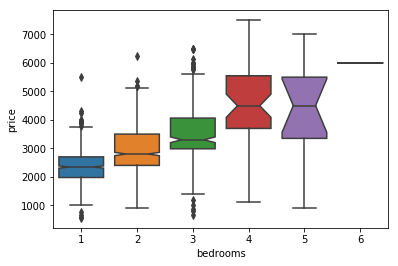

In [380]:
gr = sns.boxplot(x='bedrooms', y='price', notch=True, data=df)
# gr.set(yscale="log")

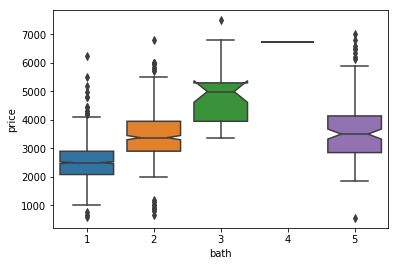

In [381]:
sns.boxplot(x='bath', y='price', notch=True, data=df)

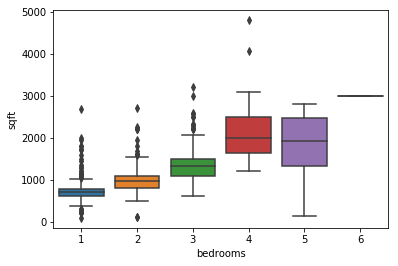

In [382]:
sns.boxplot(x='bedrooms', y='sqft', notch=False, data=df)

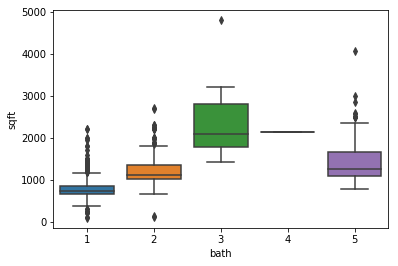

In [383]:
sns.boxplot(x='bath', y='sqft', notch=False, data=df)

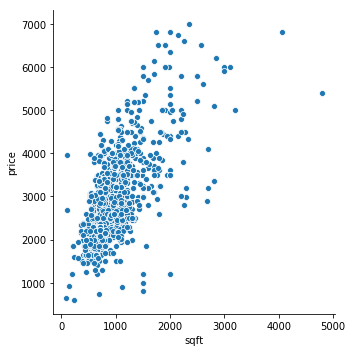

In [384]:
sns.relplot(x='sqft', y='price', data=df)

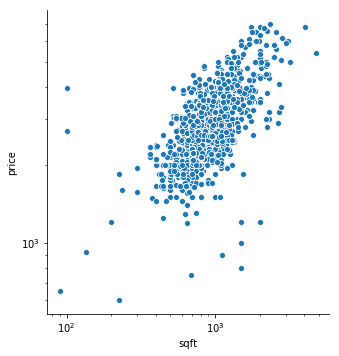

In [385]:
g = sns.relplot(x='sqft', y='price', data=df)
g.set(xscale='log', yscale='log')

/Users/sandrine/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


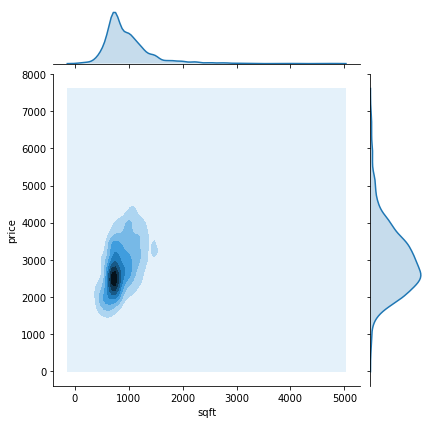

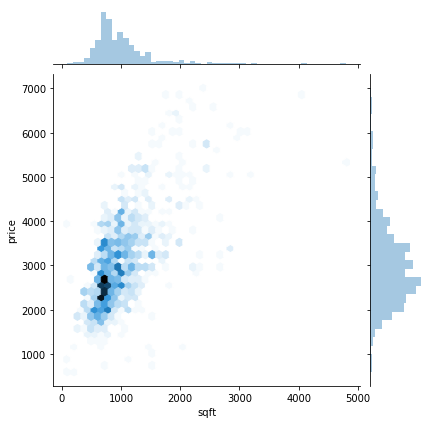

In [386]:
sns.jointplot(x='sqft', y='price', kind='kde', data=df)
sns.jointplot(x='sqft', y='price', kind='hex', data=df)

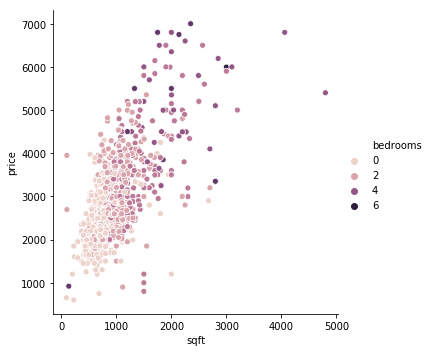

In [387]:
sns.relplot(x='sqft', y='price', hue='bedrooms', data=df)

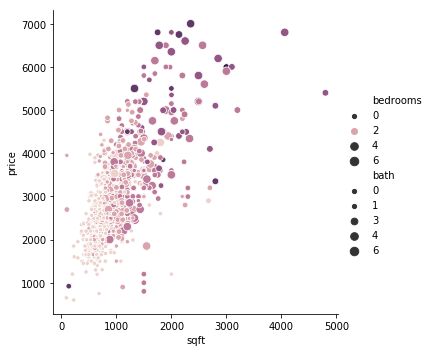

In [388]:
sns.relplot(x='sqft', y='price', hue='bedrooms', size='bath', data=df)

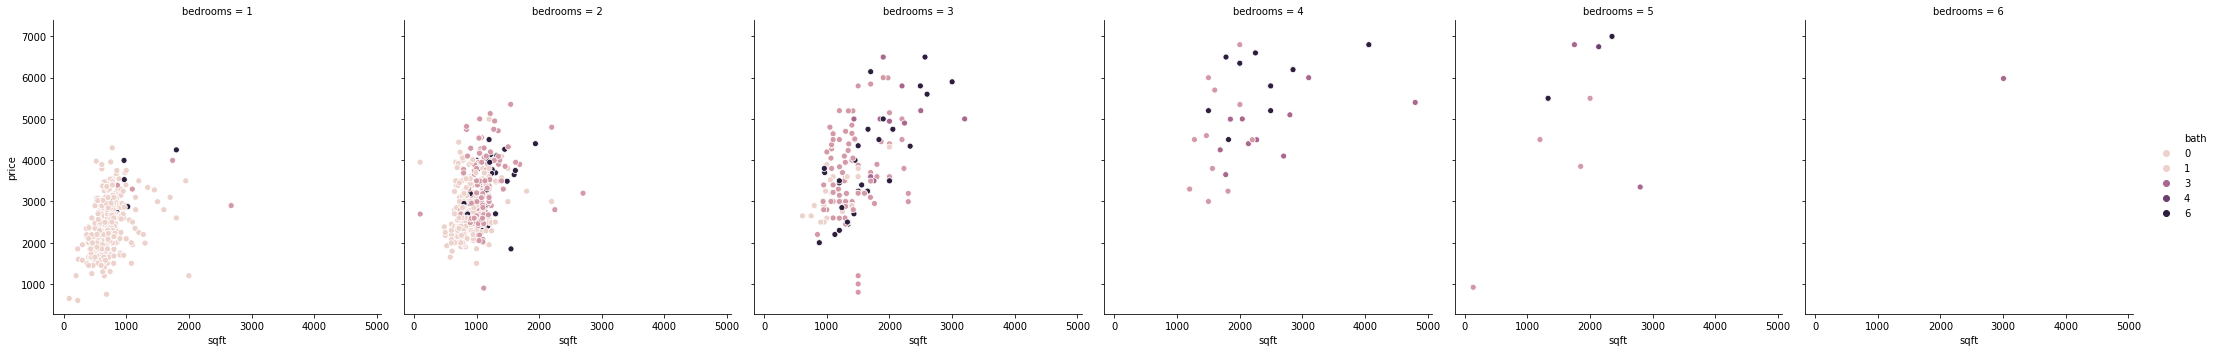

In [389]:
sns.relplot(x='sqft', y='price', col='bedrooms', hue='bath', data=df)

### Location

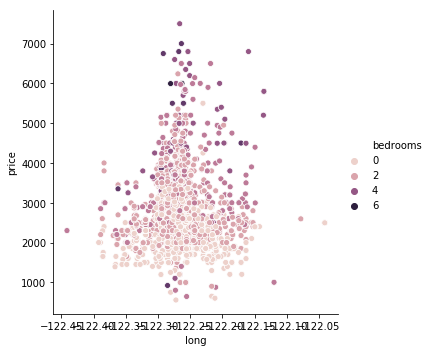

In [390]:
sns.relplot(x='long', y='price', hue='bedrooms', data=df)

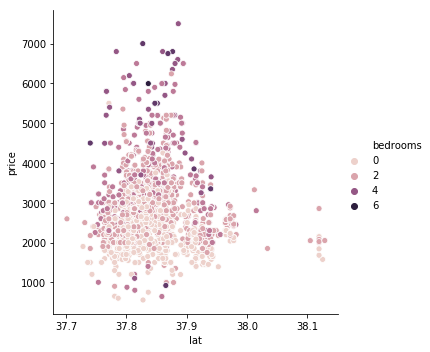

In [391]:
sns.relplot(x='lat', y='price', hue='bedrooms', data=df)

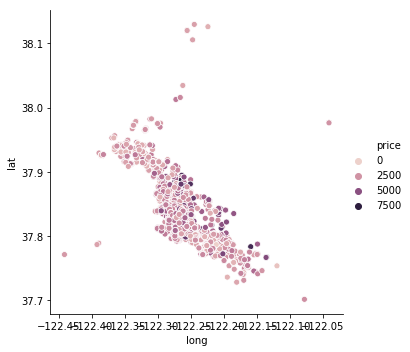

In [392]:
sns.relplot(x='long', y='lat', hue='price', data=df)